In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
data_df=web.DataReader('036570.KS', 'yahoo', '2020-05-29', '2020-11-04')
data_df_10_df = data_df[-10:]
data_df_10_lst = data_df[-10:].values.tolist()
close_lst = data_df[-11:-1]['Close']

result2 = []
for i,(row, close_value) in enumerate(zip(data_df_10_lst, close_lst)):
    result = []
    for price in row[:4]:
        result += [(price/close_value)-1]
    result2.append( result )

In [115]:
scaled_data_df = pd.DataFrame(result2, columns=['High','Low','Open','Close'])

In [6]:
data_df/10

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-29,81300.0,79000.0,80400.0,79000.0,10625.3,77548.84375
2020-06-01,82000.0,78400.0,78600.0,81600.0,8477.6,80101.08125
2020-06-02,82300.0,80800.0,81300.0,81000.0,6752.5,79512.10000
2020-06-03,81900.0,79000.0,80700.0,79200.0,12056.0,77745.16875
2020-06-04,80100.0,78000.0,78300.0,80000.0,10449.1,78530.47500
...,...,...,...,...,...,...
2020-10-29,81500.0,79300.0,79500.0,81300.0,8802.9,79806.59375
2020-10-30,81300.0,77400.0,81100.0,77600.0,9228.5,76174.56250
2020-11-02,79500.0,77700.0,78200.0,77800.0,4869.6,76370.88125


Text(0, 0.5, 'Price')

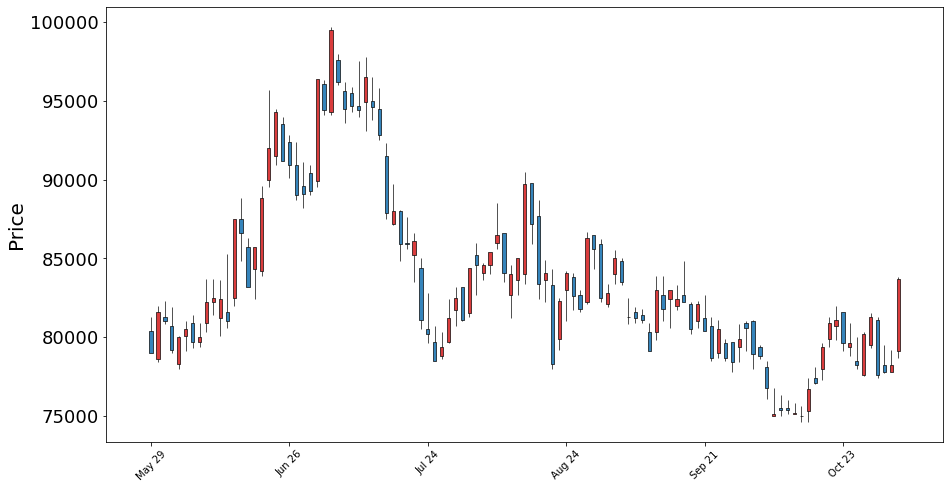

In [10]:

colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
fig, ax = plt.subplots(1,1,figsize=(15,8))
mpf.plot(data_df/10, type = 'candle',style=s,ax=ax)
_=plt.yticks(fontsize=18)
ax.set_ylabel('Price', fontsize=20)

Text(0, 0.5, 'Scaled Price')

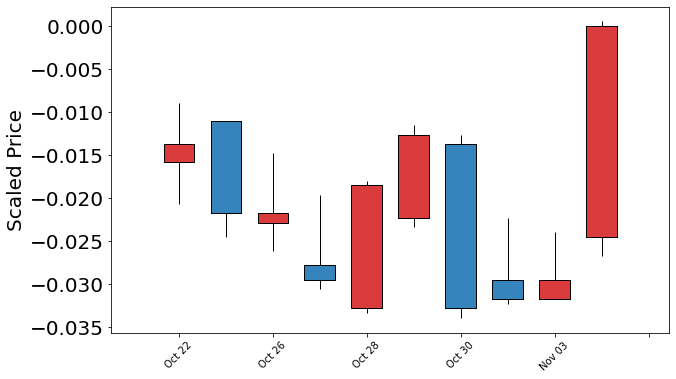

In [127]:

colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
fig, ax = plt.subplots(1,1,figsize=(10,6))
mpf.plot(scaled_data_df_10, type = 'candle',style=s,ax=ax)
_=plt.yticks(fontsize=20)
ax.set_ylabel('Scaled Price', fontsize=20)